In [31]:
# munging imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# Logistic regression visualization utility function
def generate_logreg_vis(beta=-.05):
    
    # draw feature values and use beta to calculate predicted probability
    # of positive class for each feature value
    x = np.random.uniform(low=-1, high=1, size=150) * 100
    p = 1 / (1 + np.exp(-(beta*x))) # logistic regression function
    
    # plot predicted probs against the feature 
    plt.scatter(x, p)
    plt.title('Probability of Default vs. Credit Rating Score')
    plt.ylabel('Predicted Probability of Default')
    plt.xlabel('Credit Rating Score')
    
    # 50% probability threshold
    plt.gca().axhline(.5,c='k',ls='--',lw=1)

In [32]:
# Read in my csv 
Asteroid_Data = pd.read_csv('Asteroid_Data_Cleaned_136889.csv')

/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [33]:
Asteroid_Data.describe()

,Unnamed: 0,Semi_major_axis_AU,Eccentricity,Inclination,Longitude_of_asc_node,Argument_of_perhelion,Perihelion_distance_AU,Aphelion_distance,Orbital_Period_Years,Absolute_Mag_Parameter,Earth_Min_Orbital_Intersect_Distance_AU,Mean_Motion_degrees_per_day,Orbital_Period_Days,Mean_Anomaly_Degrees
count,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,136889.000000,1.368890e+05,136889.000000
mean,191149.122179,2.815744,0.145465,10.306430,169.809612,181.883564,2.403702,3.227786,4.887648,15.177041,1.421135,0.219487,1.785214e+03,183.117205
std,180876.688135,1.526408,0.077473,6.799354,102.713179,103.554240,0.516590,2.903711,25.601934,1.407654,0.512683,0.056896,9.351106e+03,103.297565
min,0.000000,0.626226,0.000489,0.021855,0.000738,0.004466,0.081882,0.999956,0.495569,3.200000,0.000166,0.000128,1.810067e+02,0.000517
25%,49584.000000,2.538316,0.089681,5.100835,82.317807,91.898674,2.070009,2.866004,4.044146,14.400000,1.083460,0.181207,1.477124e+03,94.457400
50%,130689.000000,2.751801,0.138552,9.354499,160.468376,183.642049,2.365321,3.168601,4.564926,15.300000,1.386170,0.215913,1.667339e+03,186.876287
75%,264886.000000,3.092806,0.191073,13.688502,256.116283,271.724800,2.686421,3.468970,5.439229,16.100000,1.700050,0.243717,1.986678e+03,271.331205
max,810375.000000,389.145964,0.984348,170.323647,359.990858,359.995174,40.465671,772.201080,7676.742943,29.900000,39.507000,1.988877,2.803930e+06,359.999979


In [34]:
Asteroid_Data.head()

,Unnamed: 0,Semi_major_axis_AU,Eccentricity,Inclination,Longitude_of_asc_node,Argument_of_perhelion,Perihelion_distance_AU,Aphelion_distance,Orbital_Period_Years,Absolute_Mag_Parameter,diameter,Earth_Min_Orbital_Intersect_Distance_AU,class,Mean_Motion_degrees_per_day,Orbital_Period_Days,Mean_Anomaly_Degrees
0,0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,3.34,939.4,1.59478,MBA,0.213885,1683.145708,77.372096
1,1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,4.13,545,1.23324,MBA,0.213503,1686.155999,59.699133
2,2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,5.33,246.596,1.03454,MBA,0.226019,1592.787285,34.925016
3,3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,3.20,525.4,1.13948,MBA,0.271609,1325.432765,95.861936
4,4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,6.85,106.699,1.09589,MBA,0.238632,1508.600458,282.366289


In [35]:
Asteroid_Data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [36]:
Asteroid_Data.head()

,Semi_major_axis_AU,Eccentricity,Inclination,Longitude_of_asc_node,Argument_of_perhelion,Perihelion_distance_AU,Aphelion_distance,Orbital_Period_Years,Absolute_Mag_Parameter,diameter,Earth_Min_Orbital_Intersect_Distance_AU,class,Mean_Motion_degrees_per_day,Orbital_Period_Days,Mean_Anomaly_Degrees
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,3.34,939.4,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,4.13,545,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,5.33,246.596,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,3.20,525.4,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,6.85,106.699,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
# Create the dummy variables to represent the different classes. 



,Eccentricity,Inclination,Longitude_of_asc_node,Argument_of_perhelion,Perihelion_distance_AU,Aphelion_distance,Orbital_Period_Years,Absolute_Mag_Parameter,Near_Earth_Object,Hazardous,diameter,Earth_Min_Orbital_Intersect_Distance_AU,class,Mean_Motion_degrees_per_day,Orbital_Period_Days,Mean_Anomaly_Degrees
117900,0.288650,10.298275,346.142992,55.782412,1.819562,3.296235,4.091034,16.2,2.557898,N,2.487,0.848525,MBA,0.240924,1494.250249,37.834367
117987,0.216342,11.801104,248.664308,113.152023,2.038287,3.163696,4.194851,16.3,2.600991,N,1.551,1.069530,MBA,0.234961,1532.169442,31.288916
86696,0.161129,8.964572,79.283703,41.045826,2.304106,3.189242,4.552174,16.0,2.746674,N,3.525,1.329040,MBA,0.216518,1662.681499,73.407996
43742,0.066613,5.325966,243.400751,93.308085,2.194825,2.508100,3.605914,15.5,2.351463,N,2.003,1.192140,MBA,0.273336,1317.060039,143.498321
114163,0.125672,5.126609,209.769623,180.040454,2.835167,3.650195,5.839350,16.5,3.242681,N,4.276,1.839730,OMB,0.168790,2132.822744,293.736207


In [ ]:
# Drop the Hazardous and and Near Earth Object

/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/User

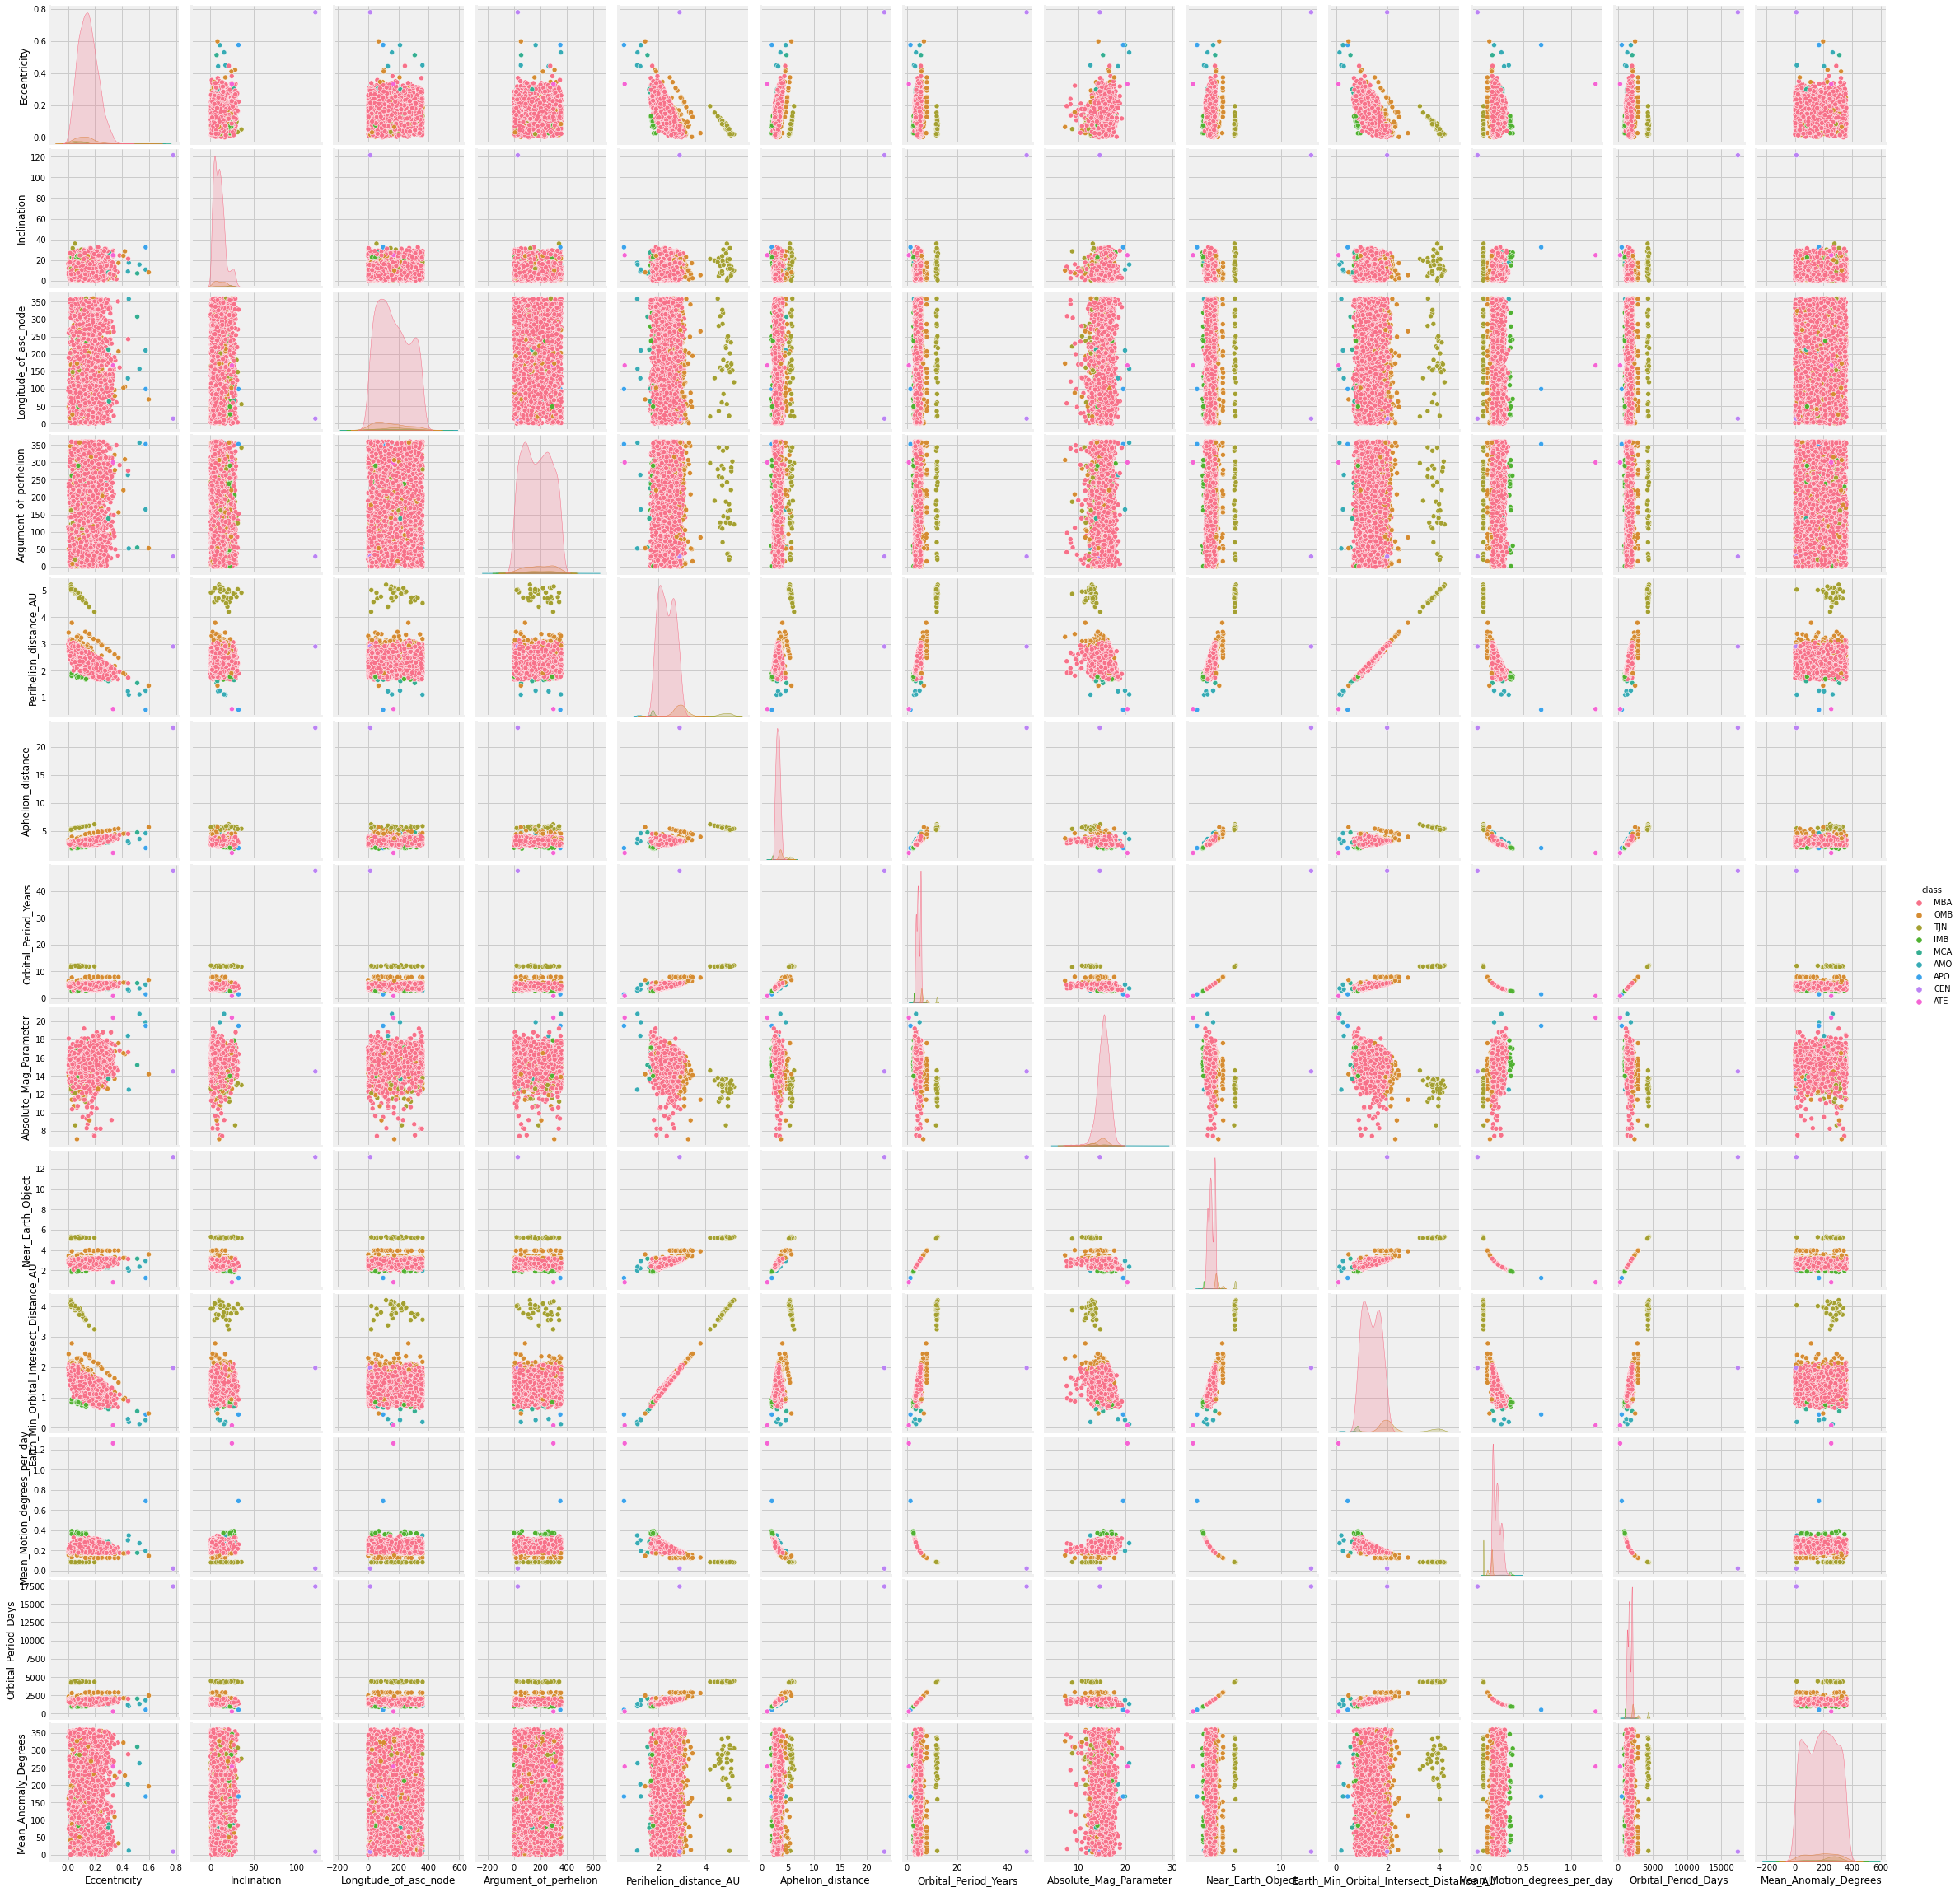

In [37]:
x = sns.pairplot(Asteroid_Data.head(2500), hue ='class')

In [39]:
# Check out the correlation coefficients for the variables 

Asteroid_Data.corr()


,Semi_major_axis_AU,Eccentricity,Inclination,Longitude_of_asc_node,Argument_of_perhelion,Perihelion_distance_AU,Aphelion_distance,Orbital_Period_Years,Absolute_Mag_Parameter,Earth_Min_Orbital_Intersect_Distance_AU,Mean_Motion_degrees_per_day,Orbital_Period_Days,Mean_Anomaly_Degrees
Semi_major_axis_AU,1.000000,0.020716,0.150393,-0.000703,-0.002457,0.366195,0.986202,0.941564,-0.132652,0.369467,-0.278642,0.941564,0.014267
Eccentricity,0.020716,1.000000,0.144513,0.000051,0.012122,-0.516054,0.113589,0.048354,0.199474,-0.492012,0.192727,0.048354,-0.018090
Inclination,0.150393,0.144513,1.000000,-0.013148,-0.004831,0.089575,0.142180,0.097154,-0.034041,0.128792,-0.112251,0.097154,0.015087
Longitude_of_asc_node,-0.000703,0.000051,-0.013148,1.000000,-0.107207,-0.003192,-0.000171,0.000364,0.002808,-0.003893,0.008267,0.000364,-0.003059
Argument_of_perhelion,-0.002457,0.012122,-0.004831,-0.107207,1.000000,-0.006665,-0.001397,-0.001637,-0.008462,-0.006547,0.002513,-0.001637,0.001931
Perihelion_distance_AU,0.366195,-0.516054,0.089575,-0.003192,-0.006665,1.000000,0.207093,0.109354,-0.375180,0.996834,-0.706077,0.109354,0.071216
Aphelion_distance,0.986202,0.113589,0.142180,-0.000171,-0.001397,0.207093,1.000000,0.970459,-0.072717,0.211096,-0.167334,0.970459,0.002330
Orbital_Period_Years,0.941564,0.048354,0.097154,0.000364,-0.001637,0.109354,0.970459,1.000000,-0.035556,0.110927,-0.059830,1.000000,-0.005316
Absolute_Mag_Parameter,-0.132652,0.199474,-0.034041,0.002808,-0.008462,-0.375180,-0.072717,-0.035556,1.000000,-0.370693,0.329979,-0.035556,-0.006064
Earth_Min_Orbital_Intersect_Distance_AU,0.369467,-0.492012,0.128792,-0.003893,-0.006547,0.996834,0.211096,0.110927,-0.370693,1.000000,-0.691900,0.110927,0.072282


In [ ]:
preds = logreg.predict(X_test)

In [1]:
## Create a confusion matrix 

log_matrix = confusion_matrix(y_test, preds)
log_matrix

NameError: name 'confusion_matrix' is not defined

In [40]:
correlations = Asteroid_Data.corr()

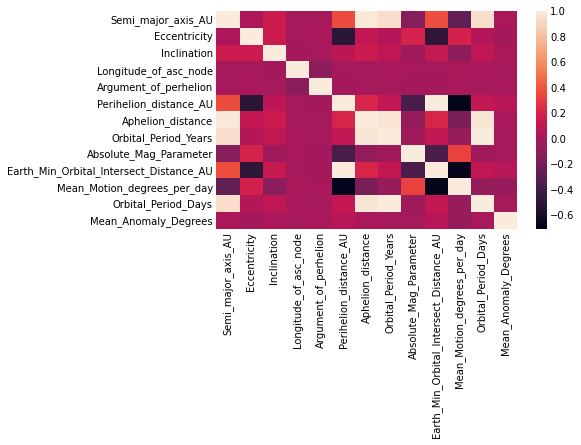

In [41]:
sns.heatmap(correlations)
plt.show()

In [ ]:
## create a confusion matrix 
## this should answer my question on how good my model is...maybe it's really good and doesn't have false positives or false 
# negatives 